<img src="Assets/banner.png">
<!-- <img src="https://www.dropbox.com/s/b3iasrh4al96r6z/banner.png?raw=1"> -->

***
# 0 Install libraries needed to run this Notebook

In [3]:
# Uncomment and run this cell if you don't have these already
# !pip install pandas
# !pip install matplotlib
# !pip install numpy
# !pip install pickle

***
# 1 Set-up the Bit style

## 1.1 Move the style sheets into your `.matplotlib` folder

Move the style sheets `bit_light.mplstyle` and `bit_dark.mplstyle` to the `stylelib` directory located in your `.matplotlib` folder. If there is not such a directory, create one. If you don't know where to find your `.matplotlib` folder you can find it by running:  

In [4]:
# Getting the folder of your .matplotlib folder
# import matplotlib as mpl; print(mpl.get_configdir())

# Run this line to see whether bit_light and bit_dark now show up in the list of styles.
# import matplotlib.pyplot as plt
# plt.style.reload_library()
# plt.style.available

## 1.2 Install Bit fonts
Make sure you have the Bit fonts installed. I added them to the folder for you to install. Alternatively, you can download them from the [Bit Google Drive](https://drive.google.com/drive/u/1/folders/1xzeIhI2yAhqHaqm4qpDM6jxE5PXsdpRv).  

***
# 2 Colours

To easily change colours, you can access them through the dictionary below.

<img src="Assets/colours.png">
<!-- <img src="https://www.dropbox.com/s/yhku9tlfyal3i0n/colours.png?raw=1"> -->

In [5]:
color_dict = {'blue':'#8caadc', 
              'pink':'#fcb1ca', 
              'orange':'#efb116', 
              'dark_blue':'#000563',
              'green':'#005f32',
              'red':'#c51914', 
              'sand':'#cec3bc'}

***
# 3 Imports & settings

In [6]:
# Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import sys
sys.path.append('colourmaps/')

# Settings for viewing, you might want to comment if you don't want to use it
%config InlineBackend.figure_format = 'retina' # high quality displaying of figures
%matplotlib inline

## In case you want to do some extra font tweaking, load them to pass them as arguments

In [11]:
# Define fontproperty objects (size is changed later with ._size attribute of the fontproperty object)
path_century = '/Users/claartje/Library/Fonts/Century-Medium.otf'
century_font = mpl.font_manager.FontProperties(fname=path_century)
century_font._size = 14 # To set its size

# For titles we want to use another 
path_roobert = '/Users/claartje/Library/Fonts/Roobert-Medium.otf'
roobert_font = mpl.font_manager.FontProperties(fname=path_roobert)
roobert_font._size = 36

# The Century font gives annoying warnings about missing glyphs, if you want to suppress those:
warnings.filterwarnings("ignore", category=RuntimeWarning)

***
# 4 Code for some demo plots
## Demo 1: line plot

In [26]:
# Code for demo 1
def demo_1(file_name, transparent=False):
    # Create figure
    fig = plt.figure(figsize=(15, 10))

    # Add subplot to figure
    ax = fig.add_subplot(111)

    # Create some data
    x = np.linspace(0, 4*np.pi, 200)

    # Plot data
    for amp in [1.0, 1.5, 2.0, 2.5]:
        ax.plot(x, amp*np.sin(x), label='A = {}'.format(amp), linewidth=1*amp) # first plotting color is blue

    # Set axis labels (pass font if you want it in Century)
    ax.set_xlabel('This is the x-axis.', fontproperties=century_font)
    ax.set_ylabel('This is the y-axis.', fontproperties=century_font)

    # Add title
    ax.set_title('Some demonstrational sine functions.', y=1.05)

    # Ticks (if you want it in Century)
    plt.yticks(fontproperties=century_font); plt.xticks(fontproperties=century_font)

    # Add legend, manually set the position to right next to the plot a bit to the top
    ax.legend(loc=(1.02, 0.8))

    # Show plot
    plt.tight_layout()
    plt.savefig(file_name, bbox_inches='tight', dpi=300, transparent=transparent)

    # Save fig
    plt.show()

## Demo 2: 4 subplots

In [19]:
# Code for demo 2
def demo_2(file_name, transparent=False):
    # Create figure with 4 subplots 2 x 2
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))

    # Create some data
    x = np.linspace(0, 4*np.pi, 200)

    # First plot: ellipses
    for i, r in enumerate([0.5, 0.9, 1.3, 1.7]):
        axs[0, 0].plot(np.sqrt(r)*np.cos(np.linspace(0, 2*np.pi, 100)), 
                       np.sqrt(r)*np.sin(np.linspace(0, 2*np.pi, 100)), label='Circle {}'.format(i), 
                       linewidth=1*(i+1))

    # Second plot
    df = pd.DataFrame({"Group 1": np.random.randint(2, 50, 10), "Group 2": np.random.randint(2, 50, 10)})
    df.plot(ax=axs[1,0], kind='bar')

    # Third plot
    n, bins, patches = axs[0, 1].hist(100 + 15 * np.random.randn(437), 50, density=1, 
                                      color=color_dict['pink'], label='Histogram', alpha=0.8)
    y = ((1 / (np.sqrt(2 * np.pi) * 15)) * np.exp(-0.5 * (1 / 15 * (bins - 100))**2))
    axs[0, 1].plot(bins, y, '--', color=color_dict['red'], linewidth=2.5, label='Fitted line')

    # Fourth plot
    for mu, sigma, marker in [(-.5, 0.75, 'o'), (0.75, 1., 's')]:
        x, y =  np.random.normal(loc=mu, scale=sigma, size=(2, 100))
        axs[1, 1].plot(x, y, ls='none', marker=marker, label='mu: {}, sigma: {}'.format(mu, sigma))

    # Add title
    mpl.rcParams['axes.titlesize'] = 28
    axs[0, 0].set_title('First plot: ellipses.', y=1.04)
    axs[1, 0].set_title('Second plot: a bar plot.', y=1.04)
    axs[0, 1].set_title('Third plot: a histogram.', y=1.04)
    axs[1, 1].set_title('Fourth plot: scatter plot.', y=1.04)

    # Add legend & axes labels
    for row in range(2):
        for col in range(2):
            axs[row, col].legend(loc=(1.02, 0.7))
            axs[row, col].set_xlabel('This is the x-axis.', fontproperties=century_font)
            axs[row, col].set_ylabel('This is the y-axis.', fontproperties=century_font)

    plt.suptitle("An example of subplots.", fontproperties=roobert_font, y=1.06)

    # Save plot
    plt.tight_layout()
    plt.savefig(file_name, bbox_inches='tight', dpi=300, transparent=transparent)

    # Show plot
    plt.show()

## Demo 3: heat maps with custom colour maps

In [20]:
# Code for demo 3
def demo_3(file_name, transparent=False):
    import pickle
    
    bit_cmap_light = pickle.load(open('colourmaps/bit_cmap_light.pkl', 'rb'))
    bit_cmap_dark = pickle.load(open('colourmaps/bit_cmap_dark.pkl', 'rb'))
    
    fig, axs = plt.subplots(1, 2, figsize=(20, 10), dpi=300)

    a = np.random.random((16, 16))
    im0 = axs[0].imshow(a, cmap=bit_cmap_light, interpolation='nearest')
    cb = fig.colorbar(im0, ax=axs[0], shrink=0.75)
    axs[0].set_title('One colour map.', y=1.04)
    cb.outline.set_linewidth(0)
    
    # Plot 
    a = np.random.random((16, 16))
    im1 = axs[1].imshow(a, cmap=bit_cmap_dark, interpolation='nearest')
    cb = fig.colorbar(im1, ax=axs[1], shrink=0.75)
    axs[1].set_title('And another one.', y=1.04)
    cb.outline.set_linewidth(0)
    
    # Labels
    for i in range(2):
        axs[i].set_xlabel('This is the x-axis.', fontproperties=century_font)
        axs[i].set_ylabel('This is the y-axis.', fontproperties=century_font)
    
    # Title
    roobert_font._size = 36
    plt.suptitle("Two different colour maps in Bit colours.", y=1.04, fontproperties=roobert_font)
    
    # Save plot
    plt.tight_layout()
    plt.savefig(file_name, bbox_inches='tight', dpi=300, transparent=transparent)

    # Show plot
    plt.show()

## Demo 4: a radar chart

In [21]:
# Code for demo 4
def demo_4(file_name, transparent=False):
    from math import pi
    from pylab import rcParams
    rcParams['figure.figsize'] = 10, 10

    # Set data
    df = pd.DataFrame({
    'group': ['A','B','C','D'],
    'One.': [38, 1.5, 30, 4],
    'Two.': [29, 10, 9, 34],
    'Three.': [8, 39, 23, 24],
    'Five': [7, 31, 33, 14],
    'Six': [28, 15, 32, 14]
    })


    # ------- PART 1: Create background

    # number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    plt.ylim(0,40)


    # ------- PART 2: Add plots

    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable

    # Ind1
    values=df.loc[0].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="Group A")
    ax.fill(angles, values, color_dict['blue'], alpha=0.3)

    # Ind2
    values=df.loc[1].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label="Group B")
    ax.fill(angles, values, color_dict['red'], alpha=0.3)

    # Title
    plt.title('A radar plot could look something like this!')
    
    # Add legend
    plt.legend(loc=(1.02, 0.8))
    
    # Save plot
    plt.tight_layout()
    plt.savefig(file_name, bbox_inches='tight', dpi=300, transparent=transparent)

    # Show plot
    plt.show()

***
# 5 Let's try them with the light theme
## But first, let's activate the light theme

In [16]:
# Activate the light theme
plt.style.reload_library()
plt.style.use('bit_light')

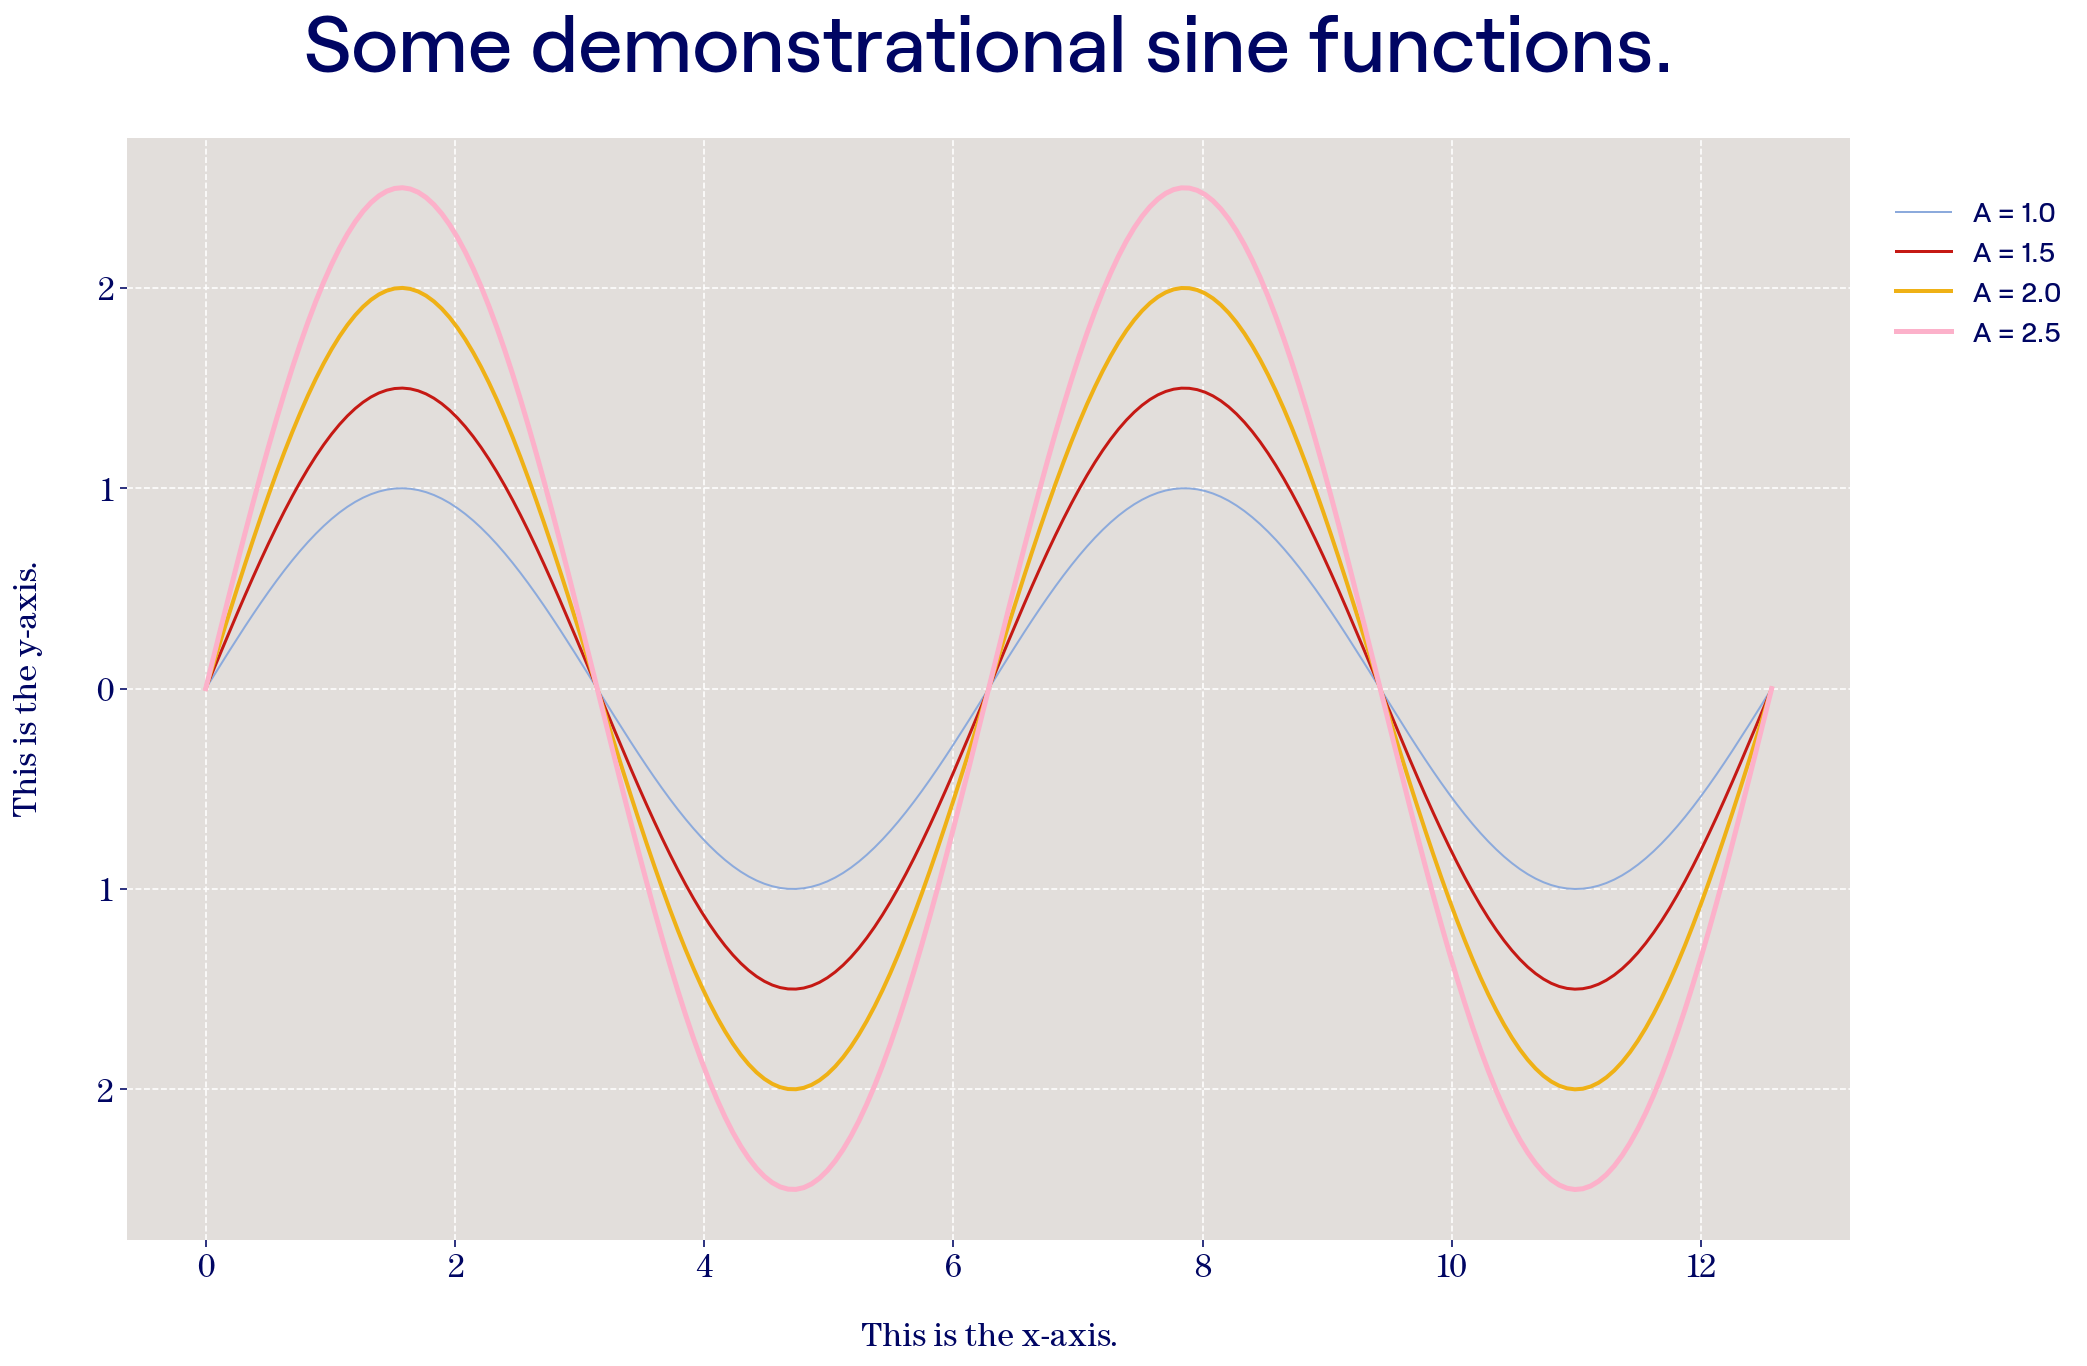

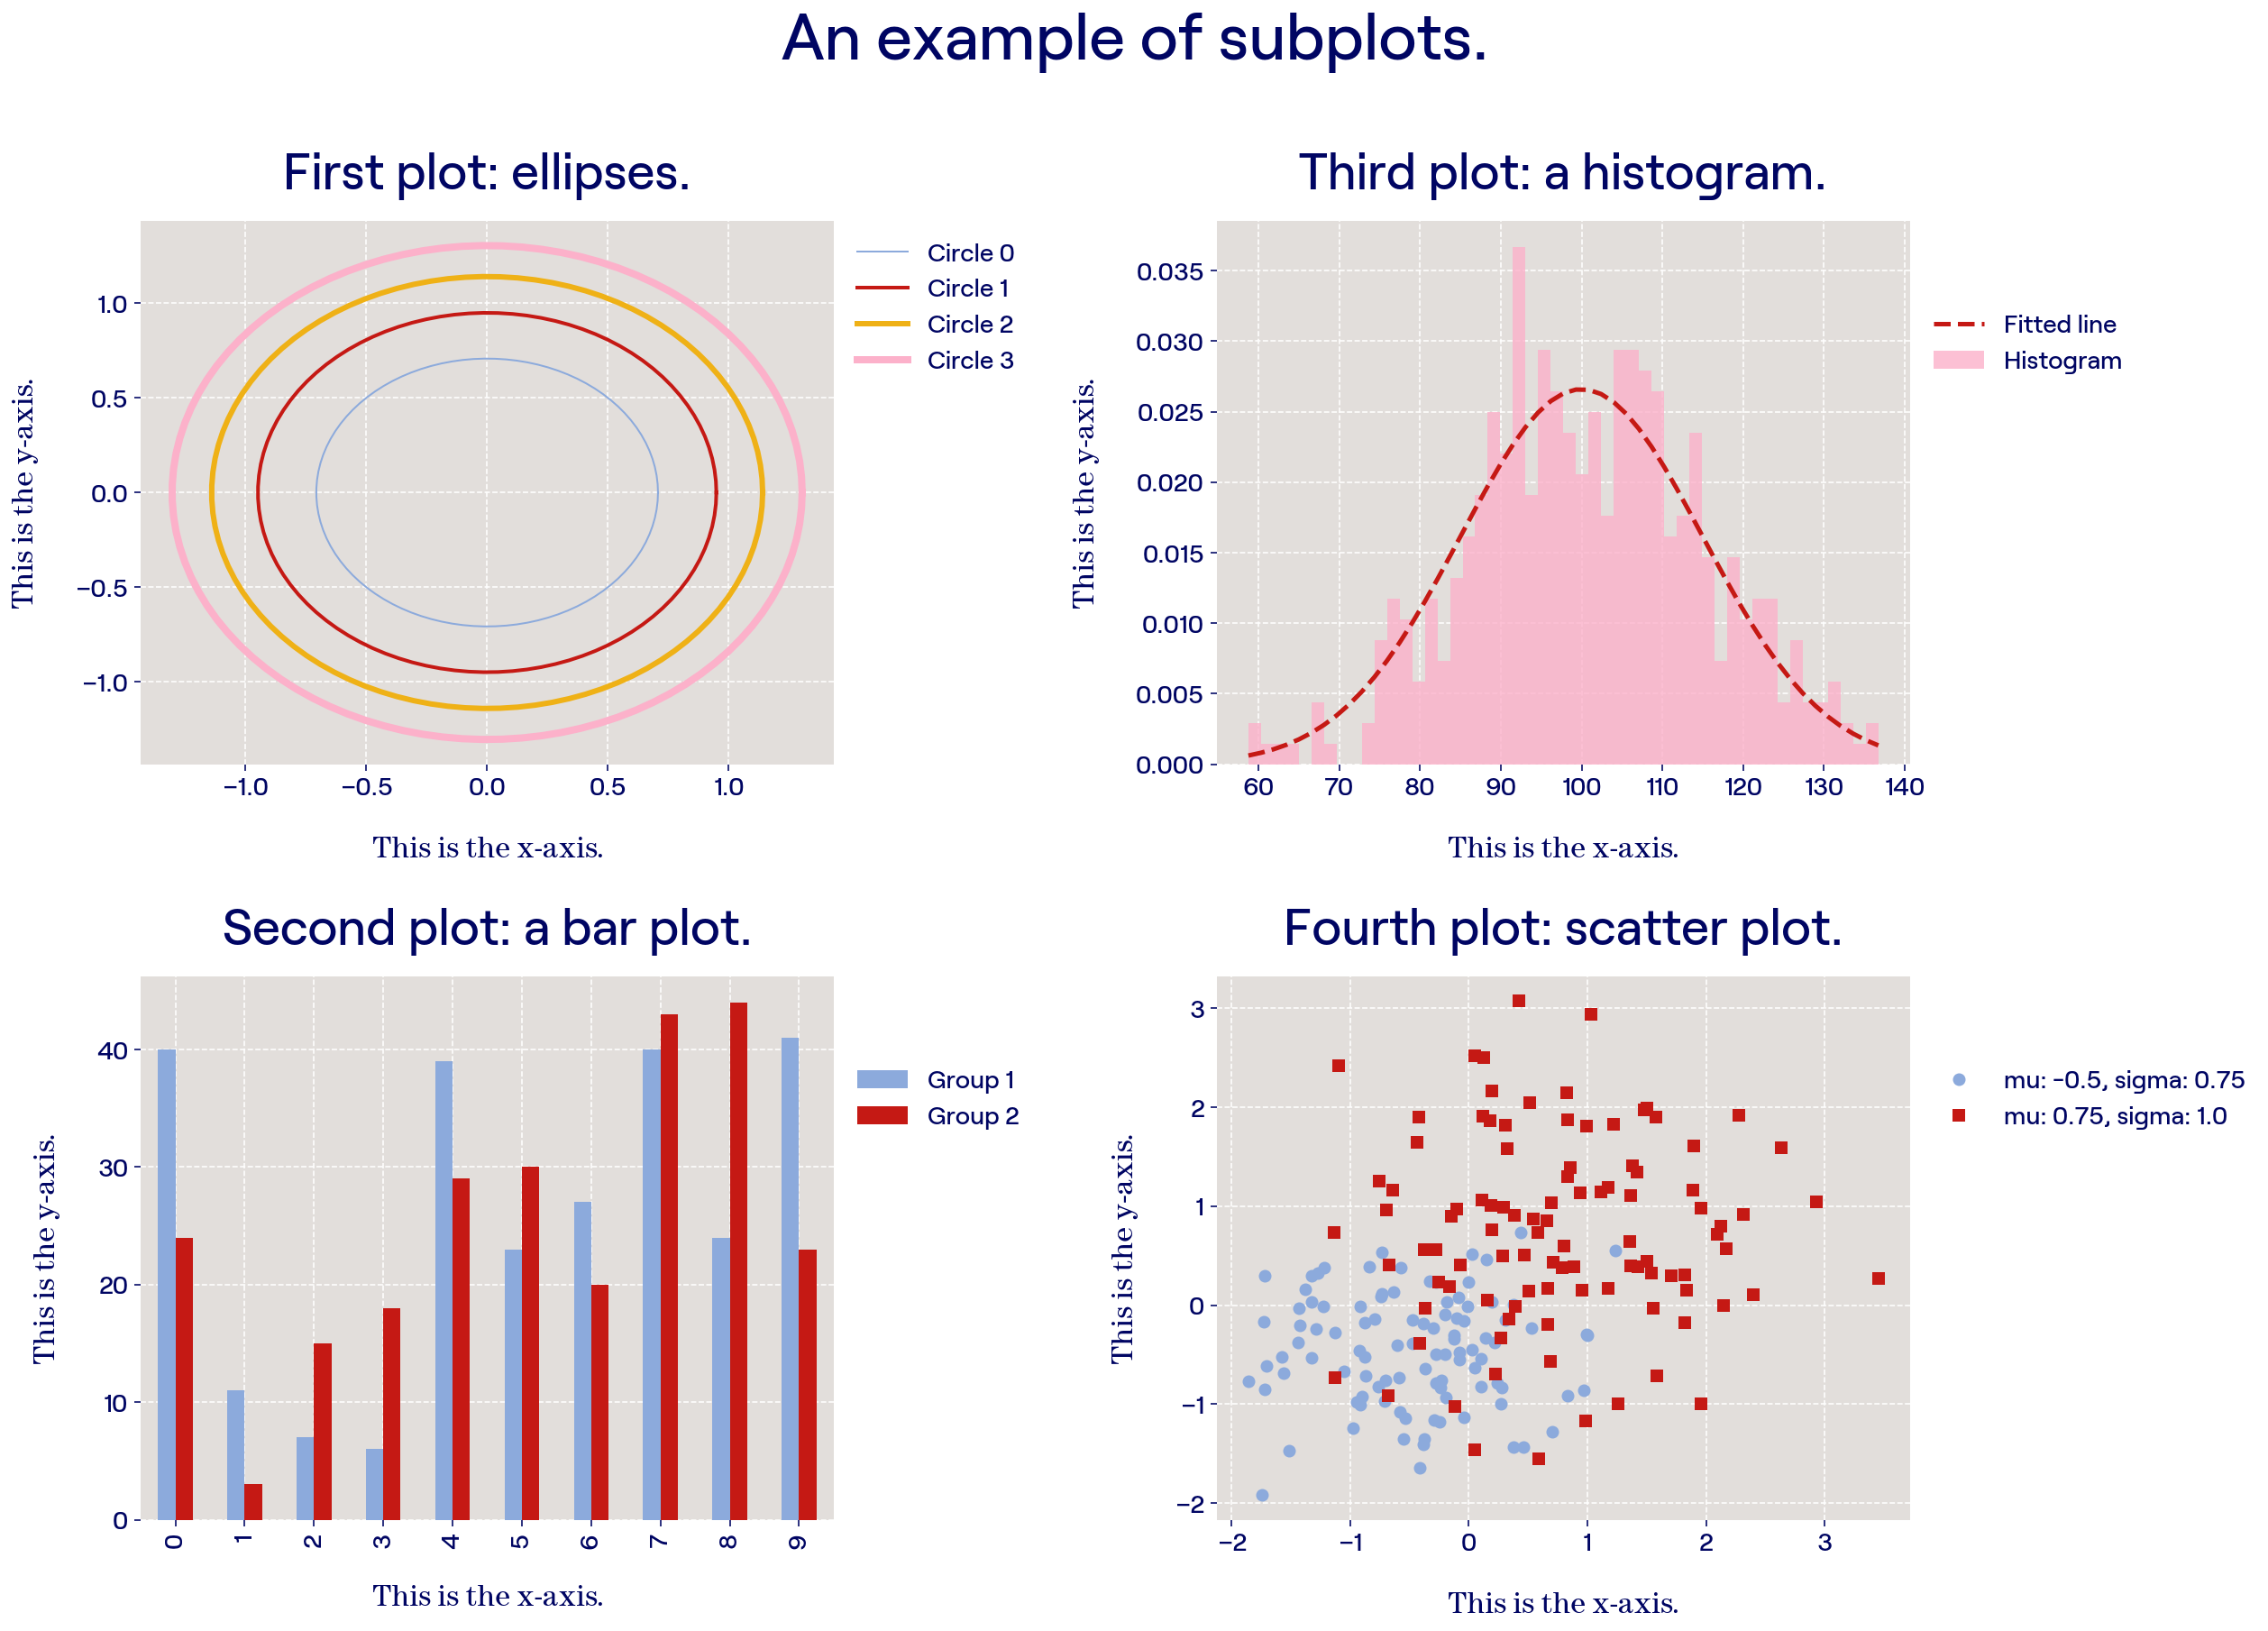

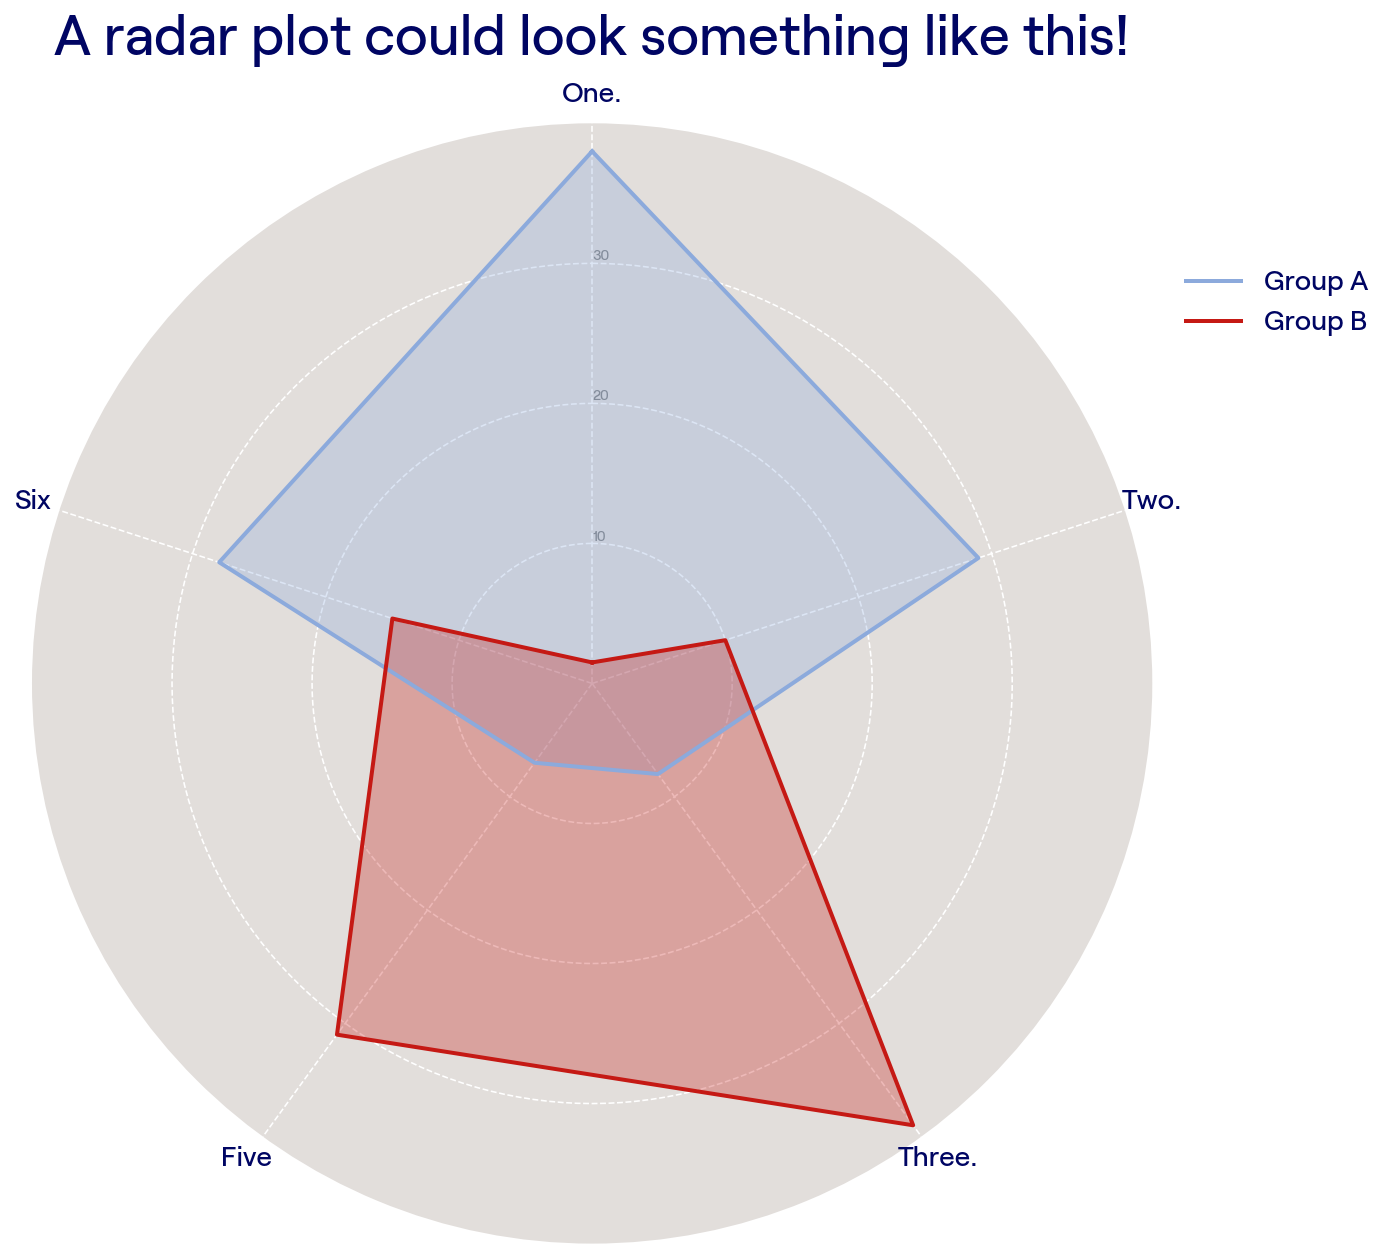

In [17]:
demo_1("Exports/light_demo_1.png") # <-- If you want vector quality, export as .svg
demo_2("Exports/light_demo_2.png")
demo_3('Exports/light_demo_3.png')
demo_4('Exports/light_demo_4.png')

# 6 Extra: create your own colour map!

In [43]:
# Bonus: create your own cmap with the Python file in this directory
import make_cmaps as mc

# Just pass a list of colours to this function from make_cmaps.py
bit_cmap_dark =  mc.make_cmap([color_dict['dark_blue'], color_dict['blue'], color_dict['pink'],  color_dict['orange'], color_dict['red']])
bit_cmap_light = mc.make_cmap([color_dict['green'], color_dict['blue'], color_dict['sand'], color_dict['pink'],color_dict['orange']])

# To save them, use pickle
import pickle

pickle.dump(bit_cmap_dark, open('colourmaps/bit_cmap_dark.pkl', 'wb'))
pickle.dump(bit_cmap_light, open('colourmaps/bit_cmap_light.pkl', 'wb'))

***
# 7 Let's try them with the dark theme
## But first, activate the dark theme

**NB: if you want to export with transparent background, for example when you have blue background slides, set `transparent = True` in `plt.savefig`.

In [22]:
# Load the dark theme
plt.style.use('bit_dark')

In [1]:
demo_1("Exports/dark_demo_1.png") # <-- If you want vector quality, export as .svg
demo_2("Exports/dark_demo_2.png")
demo_3("Exports/dark_demo_3.png")
demo_4("Exports/dark_demo_4.png")

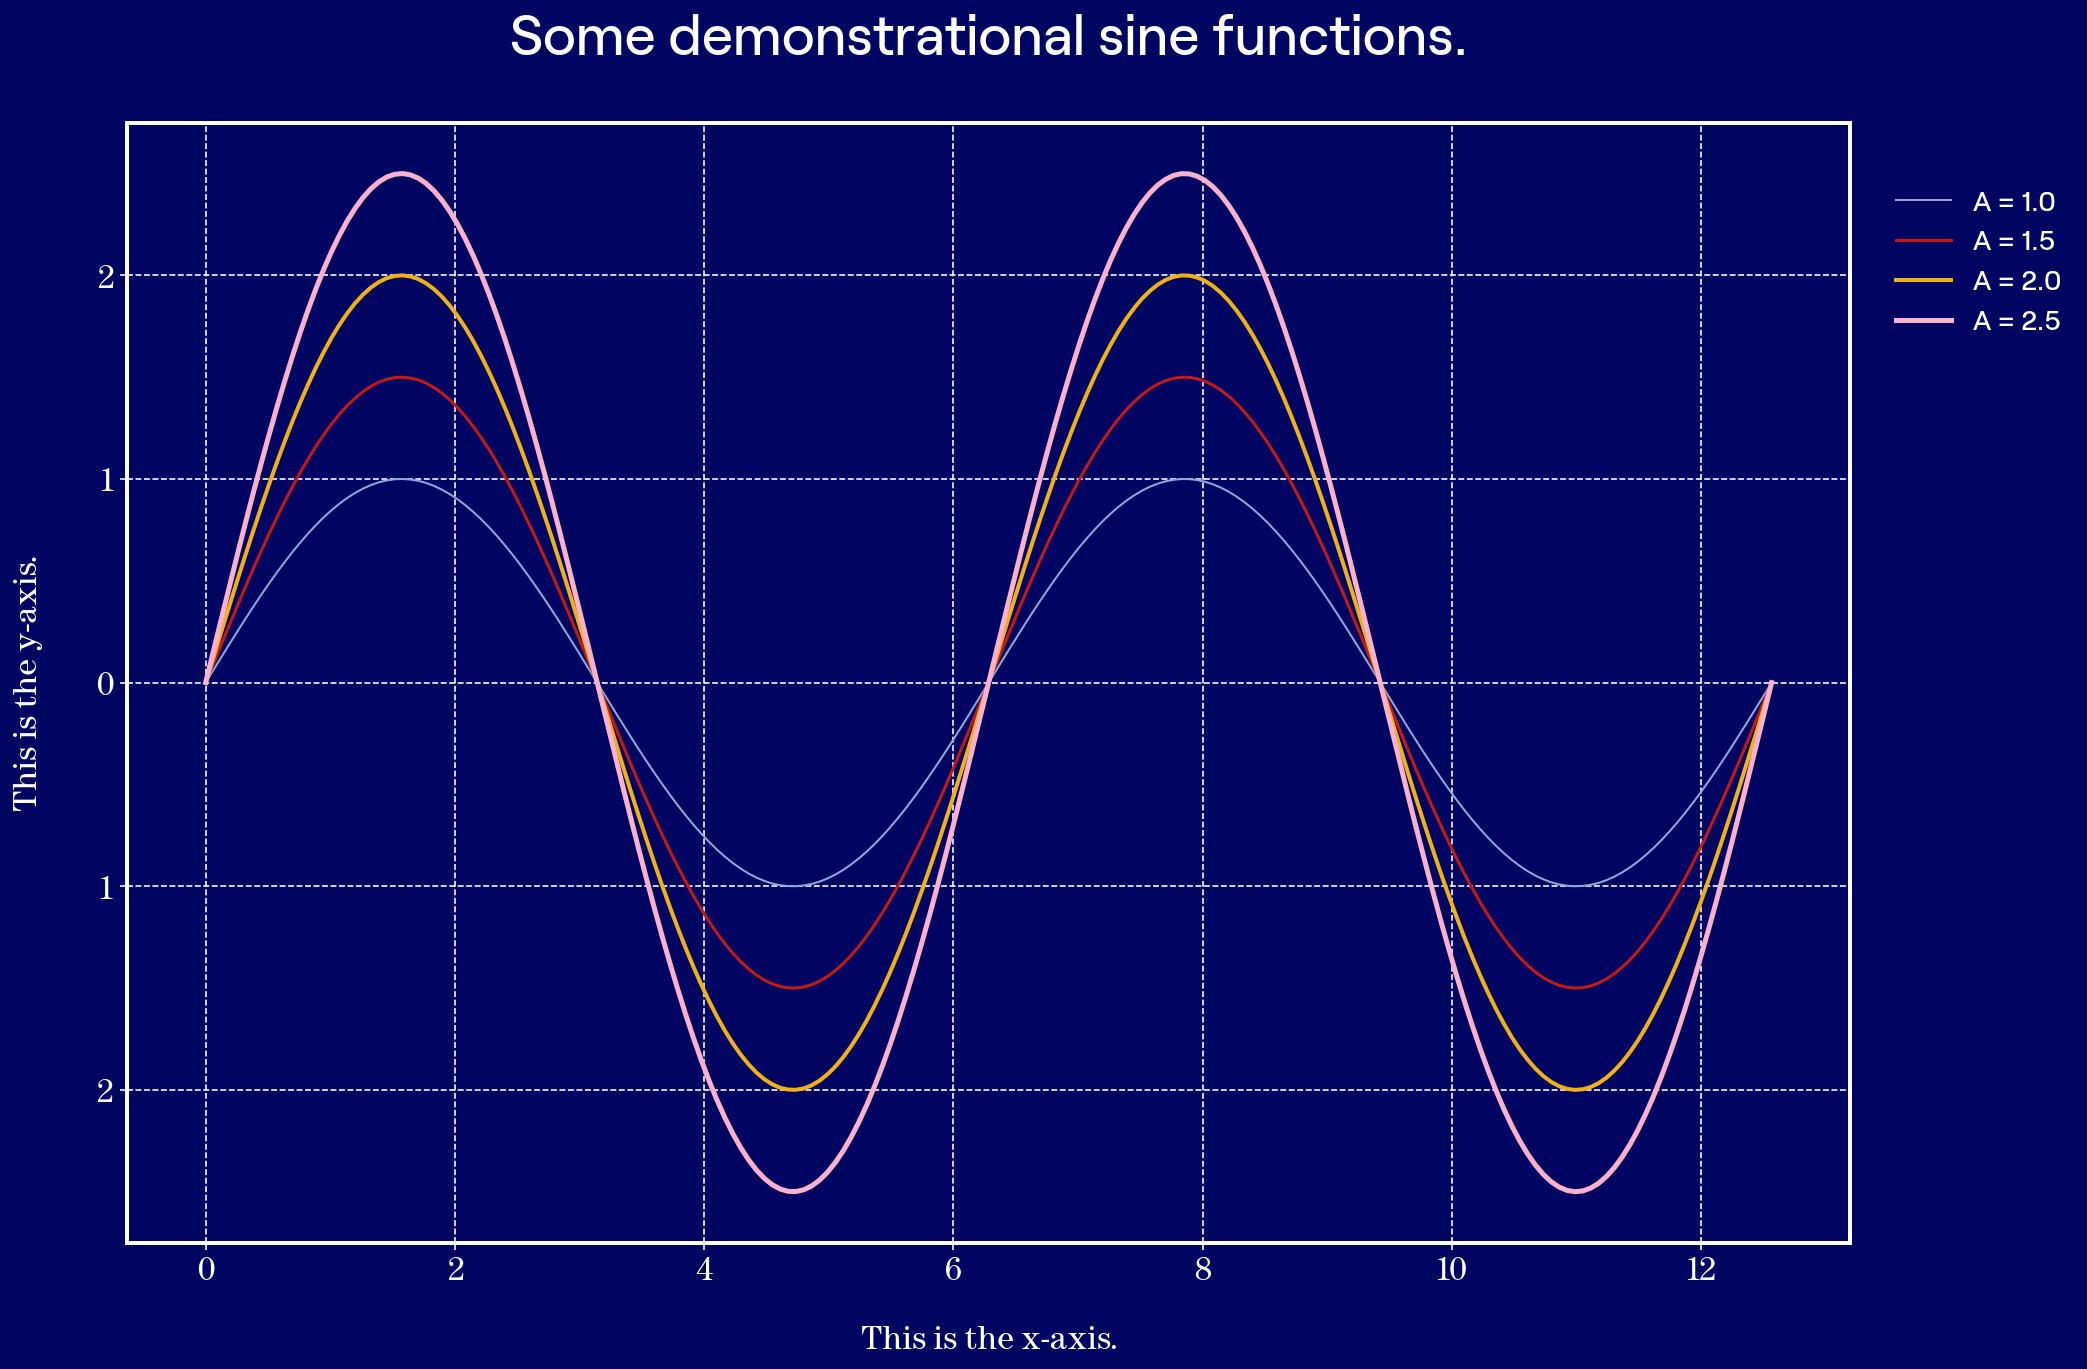

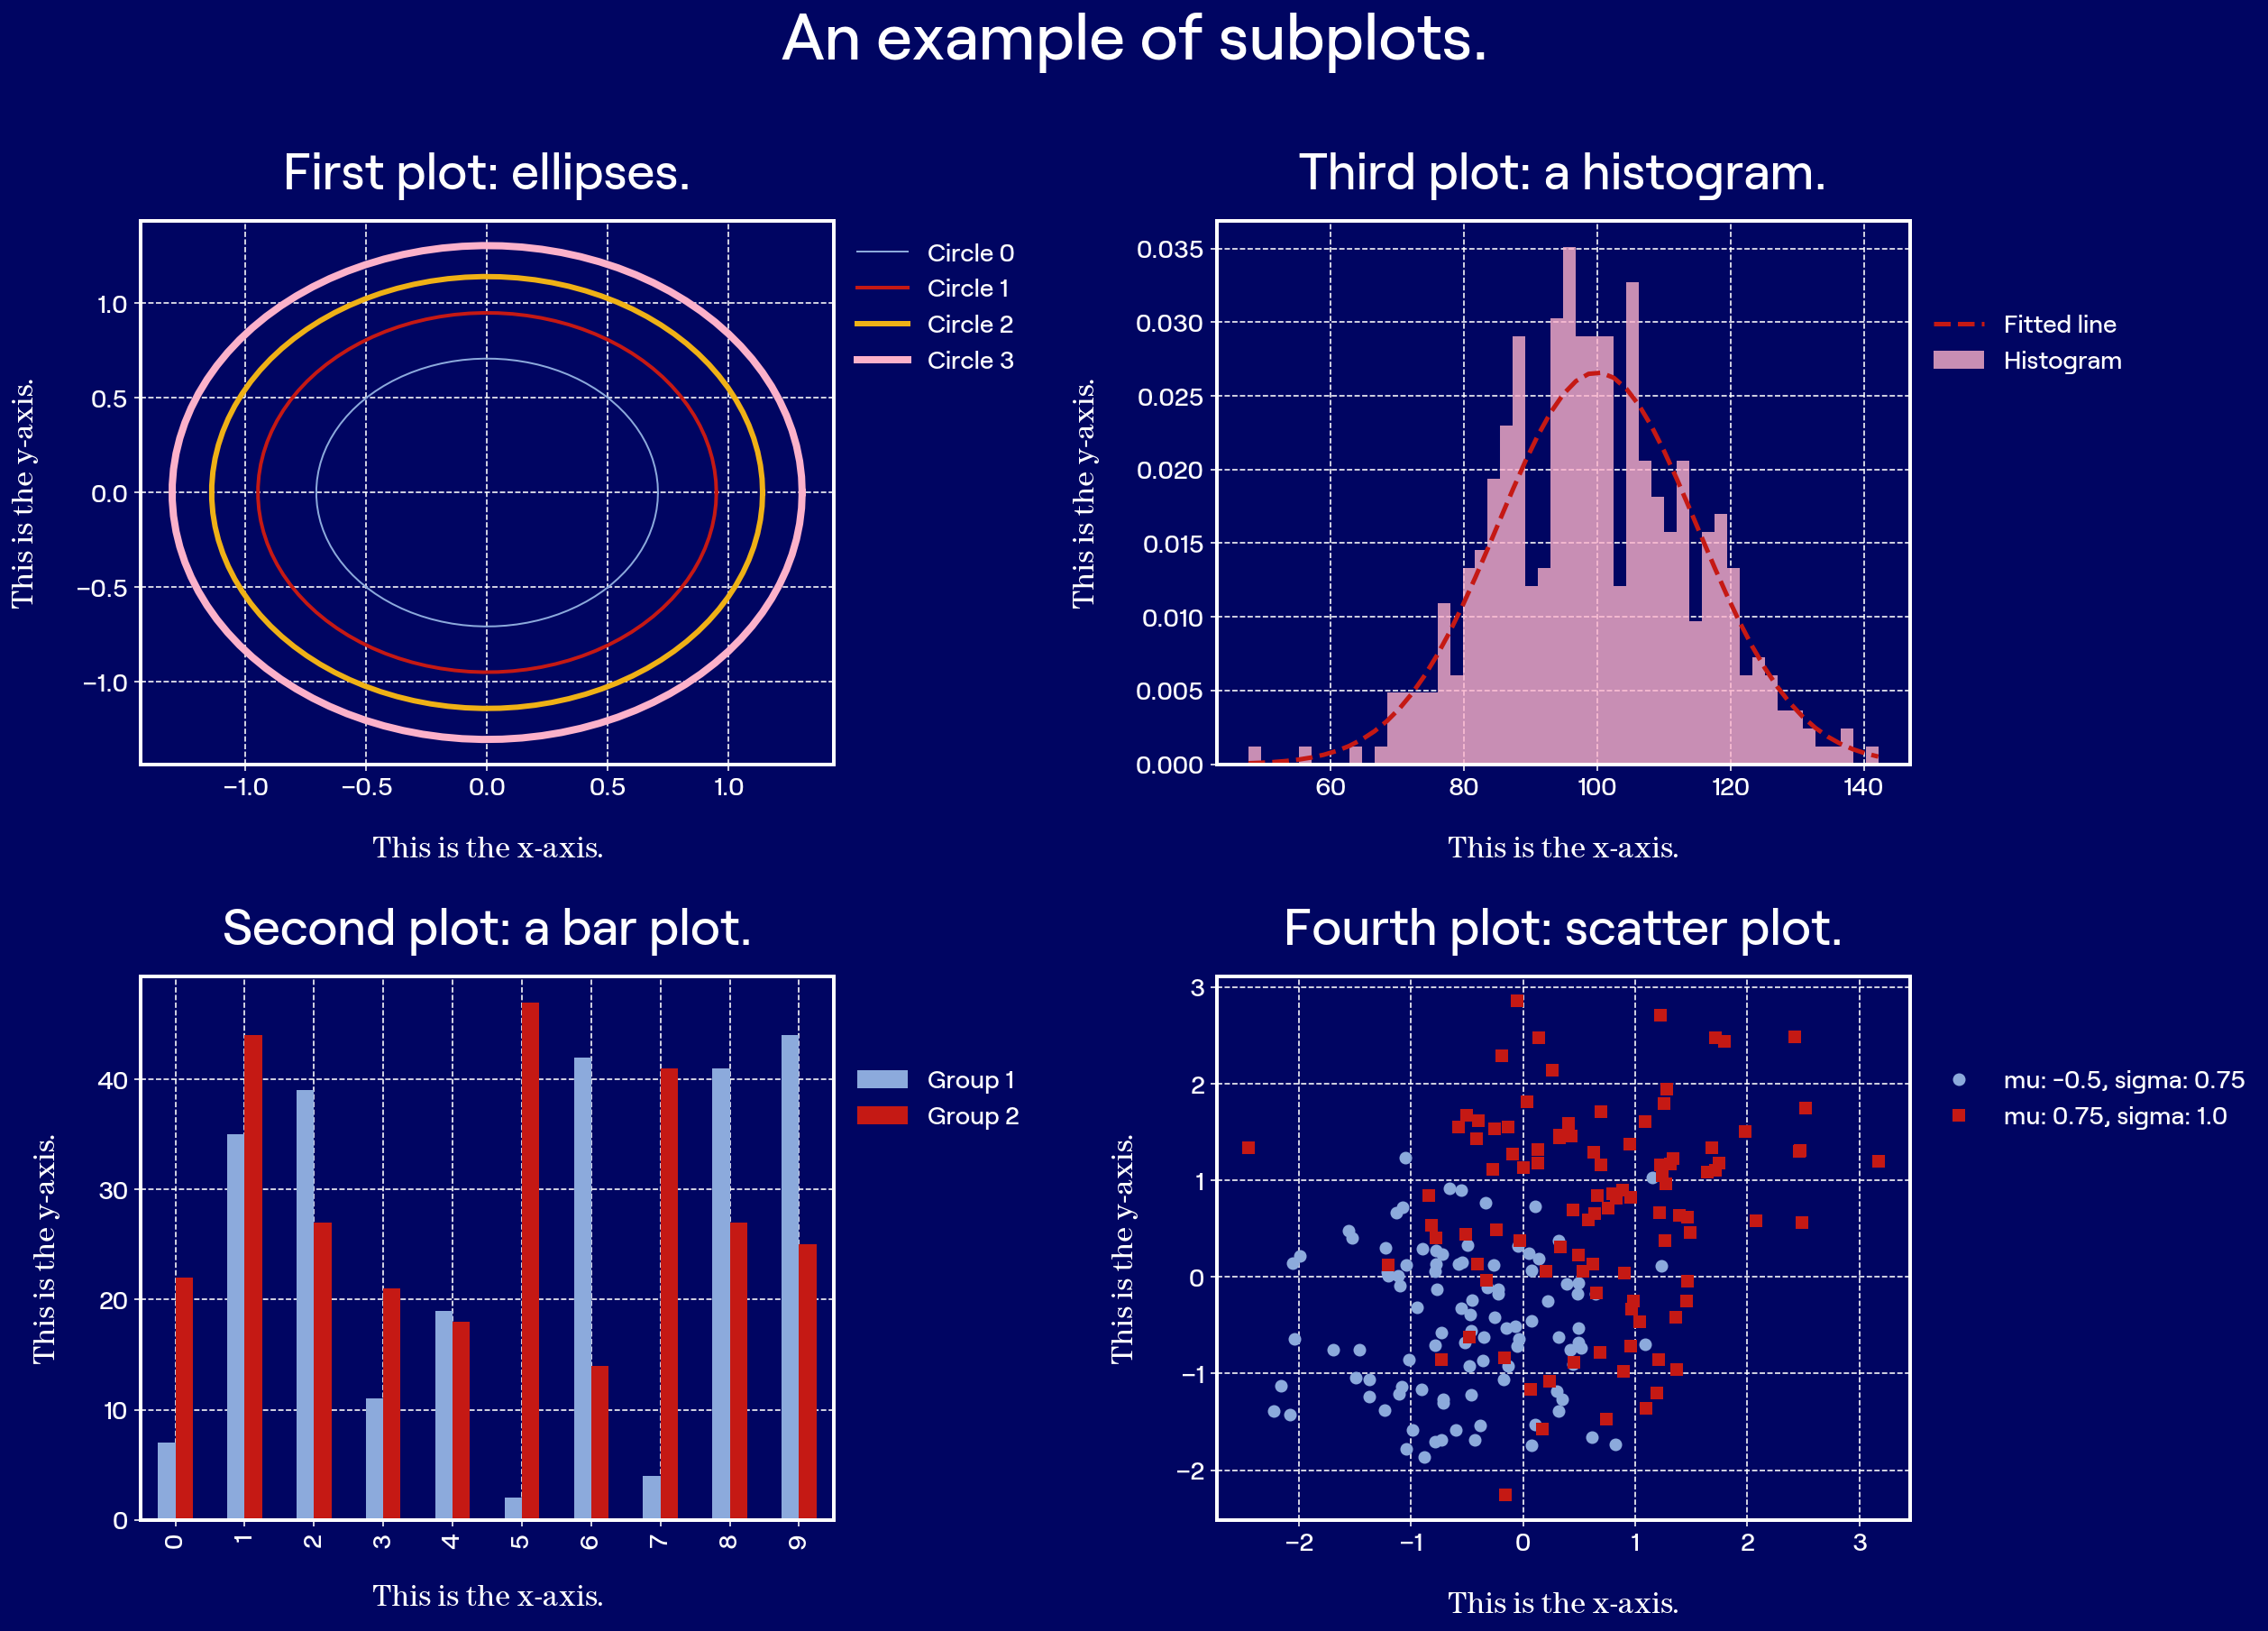

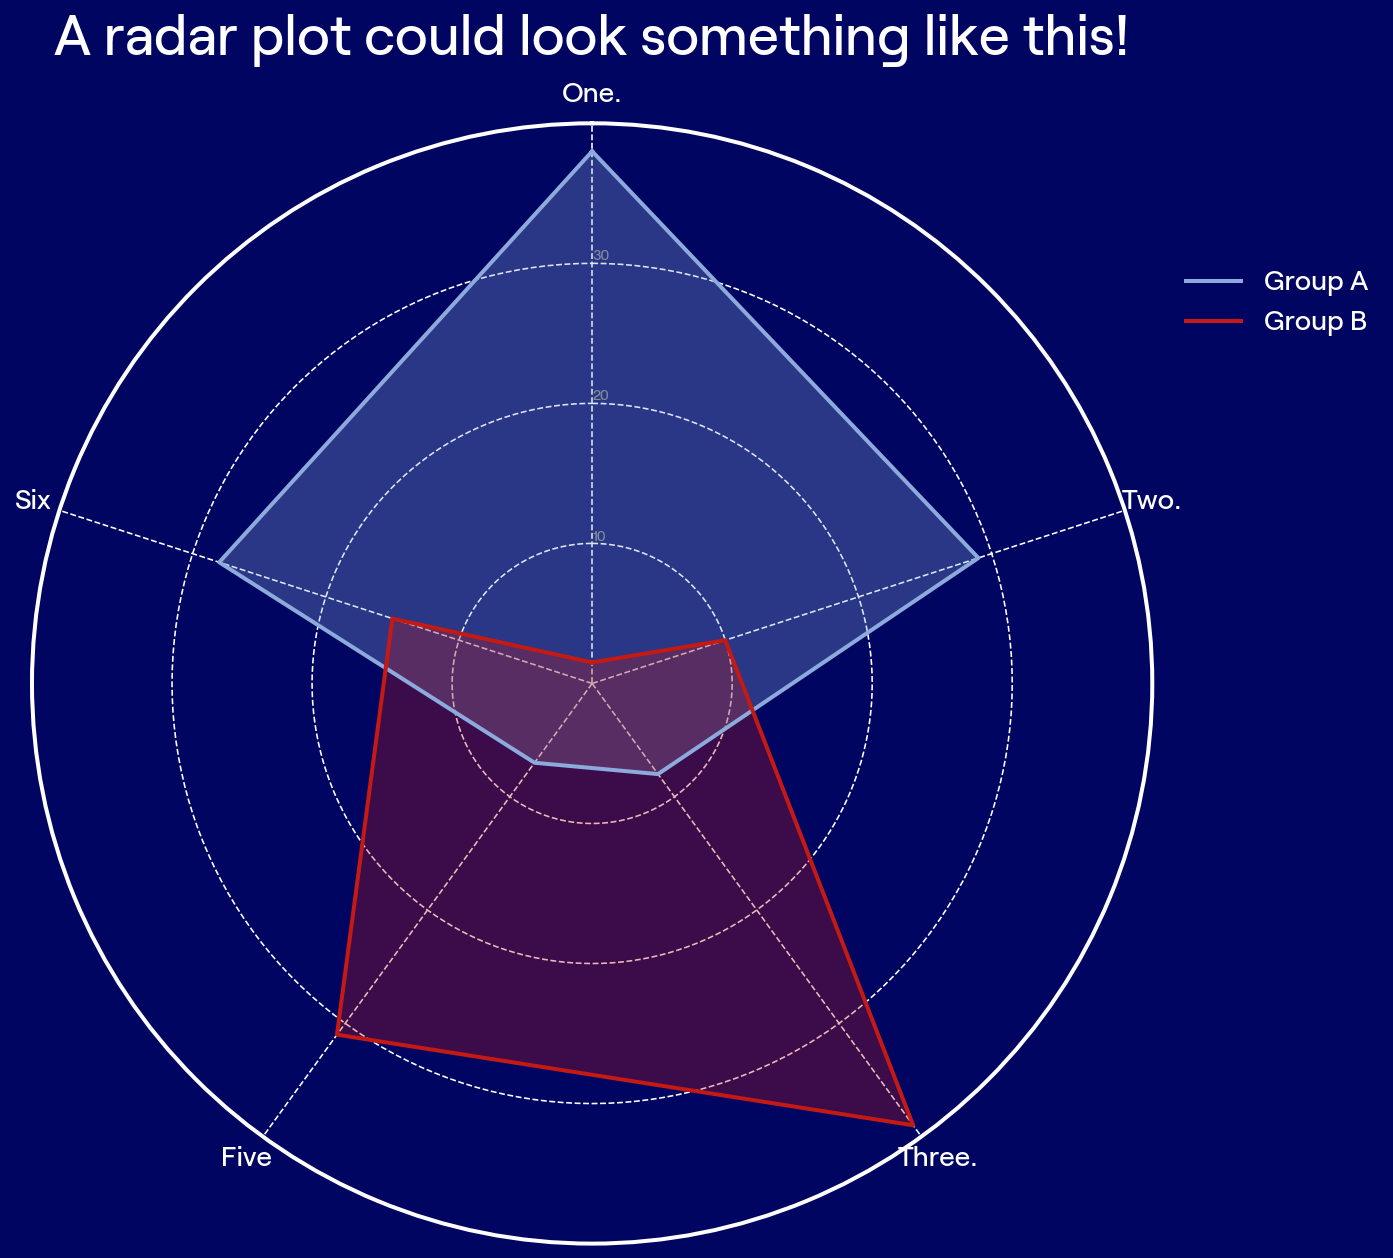

In [27]:
# # For transparent background set transparent=True
# demo_1("Exports/dark_demo_1_transparent.png", transparent=True) # <-- If you want vector quality, export as .svg
# demo_2("Exports/dark_demo_2_transparent.png", transparent=True)
# demo_3("Exports/dark_demo_3_transparent.png", transparent=True)
# demo_4("Exports/dark_demo_4_transparent.png", transparent=True)

***
# 7 Extend the theme as you like

These are some basics and you will probably run into situations where this style sheet is not giving you what you want. You can easily extend it by adding rules to the `.mplstyle` files. For a global overview of all settings possible, check out [this Github](https://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template). Also handy for setting global parameters for all your plots in one file.

***
# Happy plotting!

<img src="Assets/banner.png">
<!-- <img src="https://www.dropbox.com/s/b3iasrh4al96r6z/banner.png?raw=1"> -->